<a href="https://colab.research.google.com/github/BugYale/Data-science-PMA/blob/main/PMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')

df.head()

In [ ]:
df.count()

In [ ]:
index_to_drop = df[(df['Age(Years)'] < 14) & (df['Level of Education'].isin(['Under Graduate', 'Post Graduate']))].index

# 使用drop()函数删除age<14的本科生/研究生：删除1个
df = df.drop(index_to_drop)
df.count()

In [16]:
df.dtypes

# 记得把object类型数据转换成具体数据类型，以提高处理速度

Gender                                                           object
Home Location                                                    object
Level of Education                                               object
Age(Years)                                                        int64
Number of Subjects                                                int64
Device type used to attend classes                               object
Economic status                                                  object
Family size                                                       int64
Internet facility in your locality                                int64
Are you involved in any sports?                                  object
Do elderly people monitor you?                                   object
Study time (Hours)                                                int64
Sleep time (Hours)                                                int64
Time spent on social media (Hours)                              

In [8]:
sum_col = df['Study time (Hours)'] + df['Sleep time (Hours)'] + df['Time spent on social media (Hours)']
cond = sum_col > 24
cond

0       False
1       False
2       False
3       False
4       False
        ...  
1028    False
1029    False
1030    False
1031    False
1032    False
Length: 1032, dtype: bool

In [11]:
print(df.index[cond])

Int64Index([83, 84], dtype='int64')


In [ ]:
# 删除Study time+Sleep time+Time spent on social media>24 hours的学生：删除2个
df = df.drop(df.index[cond])

df.count()

In [18]:
# 将该列中的'Nov-20'改成'11-20'，与其他范围的格式统一
df['Average marks scored before pandemic in traditional classroom'].replace('Nov-20', '11-20', inplace=True)

df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


In [ ]:
df = df.reset_index(drop=True)

df

In [25]:
# Dealing with Categorical Data--binary
df["Gender"] = np.where(df["Gender"] == "Female", 1, 0)
df["Home Location"] = np.where(df["Home Location"] == "Rural", 1, 0)
df["Are you involved in any sports?"] = np.where(df["Are you involved in any sports?"] == "No", 1, 0)
df["Do elderly people monitor you?"] = np.where(df["Do elderly people monitor you?"] == "No", 1, 0)
df["Interested in Gaming?"] = np.where(df["Interested in Gaming?"] == "No", 1, 0)
df["Have separate room for studying?"] = np.where(df["Have separate room for studying?"] == "No", 1, 0)
df["Engaged in group studies?"] = np.where(df["Engaged in group studies?"] == "No", 1, 0)

df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0,0,Under Graduate,18,11,Laptop,Middle Class,4,5,1,...,1,1,1,1,91-100,1,1,Practical,6,Average
1,0,0,Under Graduate,19,7,Laptop,Middle Class,4,1,0,...,1,0,0,1,91-100,1,1,Theory,3,Bad
2,0,1,Under Graduate,18,5,Laptop,Middle Class,5,2,1,...,1,1,0,1,71-80,1,1,Both,6,Bad
3,0,0,Under Graduate,18,5,Laptop,Middle Class,4,4,0,...,2,1,1,0,91-100,1,2,Theory,4,Bad
4,0,1,Under Graduate,18,5,Laptop,Middle Class,4,3,1,...,2,0,0,0,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,Under Graduate,19,3,Mobile,Middle Class,6,5,0,...,4,0,0,0,91-100,4,4,Theory,8,Average
1026,1,1,Under Graduate,20,6,Desktop,Middle Class,3,1,1,...,2,0,0,1,71-80,5,5,Theory,10,Average
1027,1,1,Under Graduate,20,3,Mobile,Middle Class,3,2,1,...,3,1,0,0,71-80,2,2,Theory,6,Average
1028,1,1,Under Graduate,19,6,Mobile,Middle Class,2,3,0,...,2,0,1,1,61-70,3,3,Both,6,Good


In [27]:
# Dealing with Categorical Data--multiple

# translate marks interval into score of 1 (bad) to 10 (good)

df['Average marks scored before pandemic in traditional classroom'].replace({'0-10': 1, '11-20': 2, '21-30': 3, '31-40': 4, '41-50': 5, '51-60': 6, '61-70': 7, '71-80': 8, '81-90': 9, '91-100': 10}, inplace=True)
df['Average marks scored before pandemic in traditional classroom']

0       10
1       10
2        8
3       10
4        9
        ..
1025    10
1026     8
1027     8
1028     7
1029     9
Name: Average marks scored before pandemic in traditional classroom, Length: 1030, dtype: int64

In [28]:
#Since 'Level of Education' and 'Economic status' also tend to go from low to high, they can also be converted directly into numbers like 1 (low) to 3 (high)

df['Level of Education'].replace({'School': 1, 'Under Graduate': 2, 'Post Graduate': 3}, inplace=True)
df['Economic status'].replace({'Poor': 1, 'Middle Class': 2, 'Rich': 3}, inplace=True)
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0,0,2,18,11,Laptop,2,4,5,1,...,1,1,1,1,10,1,1,Practical,6,Average
1,0,0,2,19,7,Laptop,2,4,1,0,...,1,0,0,1,10,1,1,Theory,3,Bad
2,0,1,2,18,5,Laptop,2,5,2,1,...,1,1,0,1,8,1,1,Both,6,Bad
3,0,0,2,18,5,Laptop,2,4,4,0,...,2,1,1,0,10,1,2,Theory,4,Bad
4,0,1,2,18,5,Laptop,2,4,3,1,...,2,0,0,0,9,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,Mobile,2,6,5,0,...,4,0,0,0,10,4,4,Theory,8,Average
1026,1,1,2,20,6,Desktop,2,3,1,1,...,2,0,0,1,8,5,5,Theory,10,Average
1027,1,1,2,20,3,Mobile,2,3,2,1,...,3,1,0,0,8,2,2,Theory,6,Average
1028,1,1,2,19,6,Mobile,2,2,3,0,...,2,0,1,1,7,3,3,Both,6,Good


In [29]:
# For other types of multi-class data, generate binary values using get_dummies

df = pd.get_dummies(df, columns=["Device type used to attend classes"], prefix=["deviceType_"])
df = pd.get_dummies(df, columns=["Interested in?"], prefix=["educationalPattern_"])
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,Your level of satisfaction in Online Education,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,1,1,6,Average,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,1,1,3,Bad,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,1,1,6,Bad,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,1,2,4,Bad,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,3,3,6,Average,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,4,4,8,Average,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,5,5,10,Average,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,2,2,6,Average,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,3,3,6,Good,0,0,1,1,0,0


In [ ]:
# Separate Y value('Your level of satisfaction in Online Education')

Y_df = df.loc[:, 'Your level of satisfaction in Online Education']
Y_df

In [31]:
# DataFrame of X values

X_df = df.drop('Your level of satisfaction in Online Education', axis=1, inplace=False)
X_df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,10,1,1,6,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,10,1,1,3,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,8,1,1,6,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,10,1,2,4,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,9,3,3,6,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,10,4,4,8,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,8,5,5,10,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,8,2,2,6,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,7,3,3,6,0,0,1,1,0,0


In [ ]:
# Some ML algorithms need to satisfy the normal distribution hypothesis, such as linear regression, Gaussian process regression, etc. 
# Therefore, before selecting a suitable ML algorithm, it is necessary to check whether the column distribution in the data set is normal

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

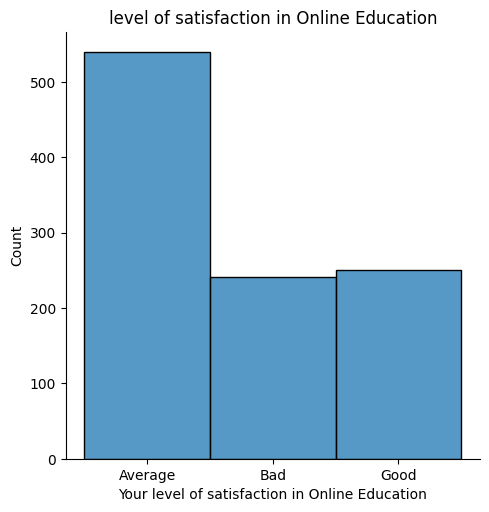

In [34]:
ax = sns.displot(Y_df).set(title='level of satisfaction in Online Education')

In [35]:
# Use the Kolmogorov-Smirnov test
from scipy.stats import kstest

for col in X_df.columns: # iteratre over each column
     # compare the column distribution to a normal distribution
    statistic, pval = kstest(X_df[col], "norm")
    print(f"column = {col}") 
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n")

column = Gender
p value = 1.2357510751860894e-238
Probably not normal


column = Home Location
p value = 1.2357510751860894e-238
Probably not normal


column = Level of Education
p value = 0.0
Probably not normal


column = Age(Years)
p value = 0.0
Probably not normal


column = Number of Subjects
p value = 0.0
Probably not normal


column = Economic status
p value = 0.0
Probably not normal


column = Family size
p value = 0.0
Probably not normal


column = Internet facility in your locality
p value = 0.0
Probably not normal


column = Are you involved in any sports?
p value = 1.2357510751860894e-238
Probably not normal


column = Do elderly people monitor you?
p value = 1.2357510751860894e-238
Probably not normal


column = Study time (Hours)
p value = 0.0
Probably not normal


column = Sleep time (Hours)
p value = 0.0
Probably not normal


column = Time spent on social media (Hours)
p value = 0.0
Probably not normal


column = Interested in Gaming?
p value = 1.2357510751860894e-238
P

In [ ]:
# The output above shows that all values don't obey normal distribution